In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob


df=pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
x=df.groupby("rating").size().reset_index(name="count")
print(x)

      rating  count
0     66 min      1
1     74 min      1
2     84 min      1
3          G     41
4      NC-17      3
5         NR     80
6         PG    287
7      PG-13    490
8          R    799
9      TV-14   2160
10      TV-G    220
11     TV-MA   3207
12     TV-PG    863
13      TV-Y    307
14     TV-Y7    334
15  TV-Y7-FV      6
16        UR      3


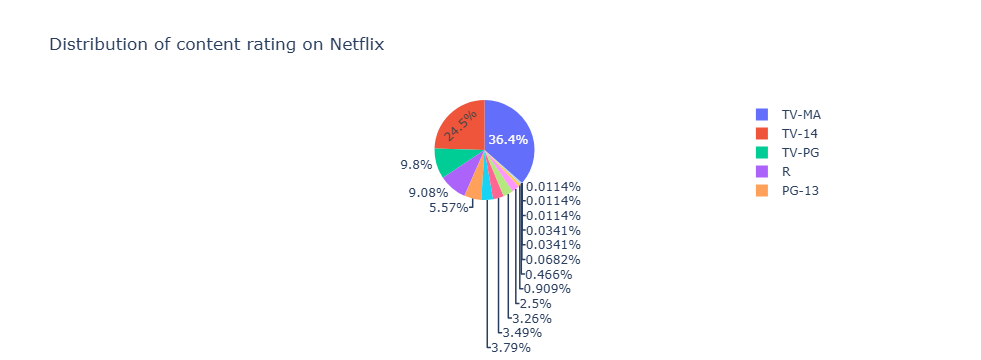

In [6]:
pichart=px.pie(x,values="count",names="rating",title="Distribution of content rating on Netflix")
pichart.show()

In [7]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
a=df.groupby("type")["release_year"].count().reset_index()
print(a)

      type  release_year
0    Movie          6131
1  TV Show          2676


In [9]:
director_list=pd.DataFrame()
print(director_list)

Empty DataFrame
Columns: []
Index: []


In [10]:
df["director"]=df["director"].fillna("director not specified")

In [11]:
director_list=df["director"].str.split(",",expand=True).stack()
director_list=director_list.to_frame()
director_list.columns=["Directors"]
print(director_list)

                     Directors
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [12]:
directors=director_list.groupby("Directors").size().reset_index(name="total count")
print(directors)

                      Directors  total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [13]:
directors=directors[directors.Directors !="director not specified"]
print(directors)

                      Directors  total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [14]:
directors=directors.sort_values(by=["total count"], ascending=False)
print(directors)

            Directors  total count
4020    Rajiv Chilaka           22
4067      Raúl Campos           18
261         Jan Suter           18
4651      Suhas Kadav           16
3235     Marcus Raboy           16
...               ...          ...
2340         J. Davis            1
2341  J. Lee Thompson            1
2342  J. Michael Long            1
609    Smriti Keshari            1
2560    Joaquín Mazón            1

[5120 rows x 2 columns]


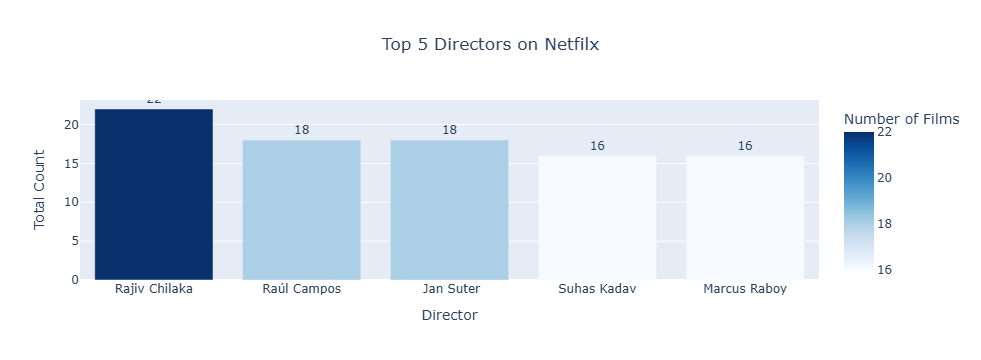

In [15]:
top_directors = directors.head(5)

fig = px.bar(
    top_directors,
    x='Directors',
    y='total count',
    title='Top 5 Directors on Netfilx',
    text='total count',
    labels={'Directors': 'Director', 'total count': 'Number of Films'},
    color='total count',
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title='Director',
    yaxis_title='Total Count',
    title_x=0.5,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.update_traces(textposition='outside')

fig.show()

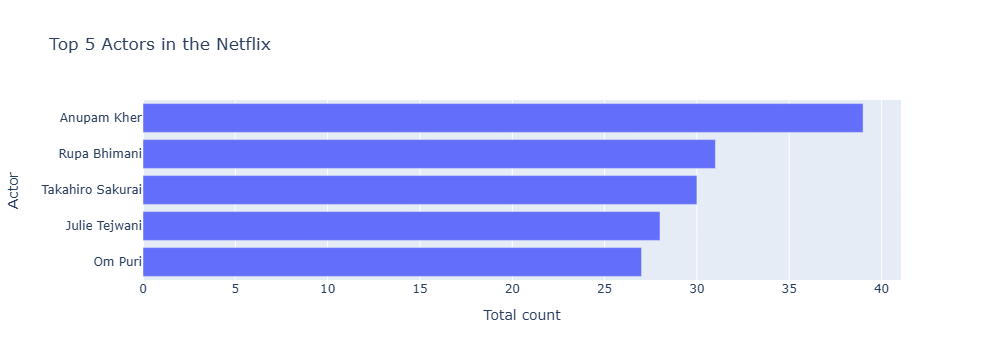

In [16]:
df["cast"]=df["cast"].fillna("cast not given")
cast_df=pd.DataFrame()
cast_df=df["cast"].str.split(",",expand=True).stack()
cast_df=cast_df.to_frame()
cast_df.columns=['Actor']
actor=cast_df.groupby(["Actor"]).size().reset_index(name="Total count")
actor=actor[actor.Actor!="cast not given"]
actor=actor.sort_values(by="Total count", ascending=False)
top5=actor.head()
top5=top5.sort_values(by="Total count",ascending=True)
barchart2=px.bar(top5, x='Total count', y="Actor", title="Top 5 Actors in the Netflix")
barchart2.show()

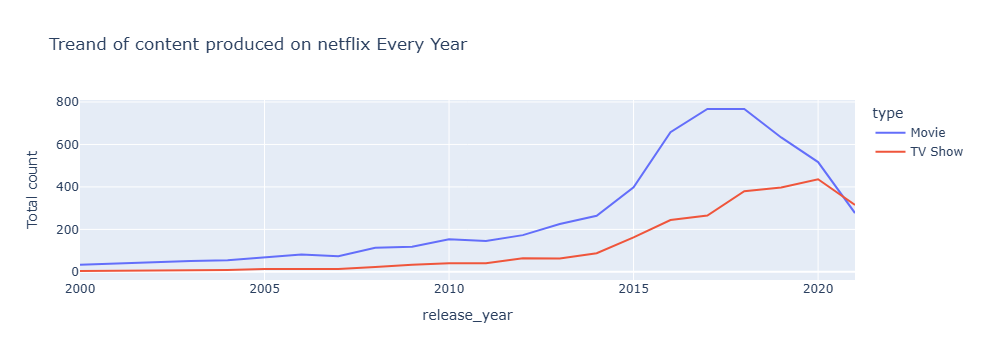

In [17]:
df1=df[["type","release_year"]]
df1=df1.groupby(["type","release_year"]).size().reset_index(name="Total count")
df1=df1[df1["release_year"]>=2000]
graph=px.line(df1,x="release_year",y="Total count", color="type",title="Treand of content produced on netflix Every Year")
graph.show()

C:\Users\Sanket\AppData\Local\Temp\ipykernel_10612\522765257.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



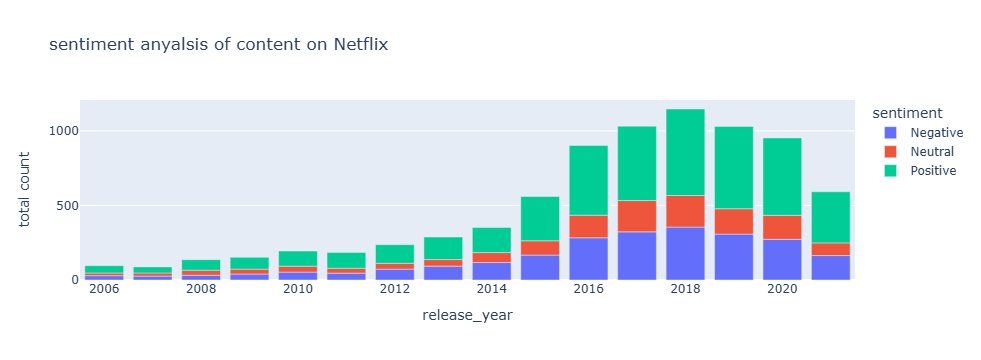

In [19]:
df3=df[['release_year','description']]
for index,row in df3.iterrows():
    d=row["description"]
    testimonial=TextBlob(d)
    p=testimonial.sentiment.polarity
    if p==0:
        sent="Neutral"
    elif p>0:
        sent="Positive"
    else:
        sent="Negative"
    df3.loc[[index,2],'sentiment']=sent

df3=df3.groupby(['release_year','sentiment']).size().reset_index(name='total count')

df3=df3[df3['release_year']>2005]
bargraph=px.bar(df3,x="release_year",y="total count", color="sentiment",title="sentiment anyalsis of content on Netflix")
bargraph.show()